In [ ]:
import pathlib
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2L, MobileNetV2, ResNet50, VGG16, Xception
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
batch_size = 32
img_width = 224
img_height = 224
epochs = 10

In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/TEIA/Final/Escala de cinza/Treino/')
#Modificar o diretório para realizar o treinamento em RGB:
#data_dir = pathlib.Path('/content/drive/MyDrive/TEIA/Final/RGB/Treino/')

In [ ]:
namecheckpoint = '/content/drive/MyDrive/TEIA/Final/Escala de cinza/models/.{epoch:02d}-{val_accuracy:.2f}.h5'
#Modificar o caminho da criação do checkpoint para a base de dados em RGB:
#namecheckpoint = '/content/drive/MyDrive/TEIA/Final/RGB/models/.{epoch:02d}-{val_accuracy:.2f}.h5'
model_checkpoint_callback = ModelCheckpoint(namecheckpoint,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
 )

In [ ]:
classes = pathlib.Path(data_dir).glob('*')
classes = [x for x in classes if x.is_dir()]
classes = sorted([x.stem for x in classes])
print(classes)

['Cachorro', 'Cobra', 'Gato', 'Onca']


In [ ]:
dataset_treino = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  #Retirar o parâmetro 'color_mode' para trabalhar com base de dados em RGB:
  color_mode='grayscale',
  batch_size=batch_size)

Found 5116 files belonging to 4 classes.
Using 4093 files for training.


In [ ]:
dataset_validacao = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  #Retirar o parâmetro 'color_mode' para trabalhar com base de dados em RGB:
  color_mode='grayscale',
  batch_size=batch_size)

Found 5116 files belonging to 4 classes.
Using 1023 files for validation.


In [ ]:
img_input = tf.keras.layers.Input(shape=(img_height, img_width,1))
img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

In [ ]:
pre_trained_model = Xception(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3), input_tensor=img_conc)


In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
x = layers.Flatten()(pre_trained_model.output)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(len(classes), activation='softmax')(x)


In [ ]:
model3 = Model(inputs=pre_trained_model.input, outputs=predictions)

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model3.fit(
    dataset_treino,
    validation_data=dataset_validacao,
    epochs=epochs,
    callbacks=[model_checkpoint_callback]
)

Epoch 1/10
128/128 [==============================] - 30s 208ms/step - loss: 40.5038 - accuracy: 0.5927 - val_loss: 23.0540 - val_accuracy: 0.6784
Epoch 2/10
128/128 [==============================] - 23s 177ms/step - loss: 29.9952 - accuracy: 0.6841 - val_loss: 41.4349 - val_accuracy: 0.7410
Epoch 3/10
128/128 [==============================] - 24s 180ms/step - loss: 21.9046 - accuracy: 0.7388 - val_loss: 22.5470 - val_accuracy: 0.7390
Epoch 4/10
128/128 [==============================] - 23s 175ms/step - loss: 20.4670 - accuracy: 0.7752 - val_loss: 26.8654 - val_accuracy: 0.6891
Epoch 5/10
128/128 [==============================] - 23s 176ms/step - loss: 20.5387 - accuracy: 0.7911 - val_loss: 24.7899 - val_accuracy: 0.7683
Epoch 6/10
128/128 [==============================] - 23s 175ms/step - loss: 14.7815 - accuracy: 0.8290 - val_loss: 28.4206 - val_accuracy: 0.6657
Epoch 7/10
128/128 [==============================] - 23s 172ms/step - loss: 19.0669 - accuracy: 0.8160 - val_loss: 25

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

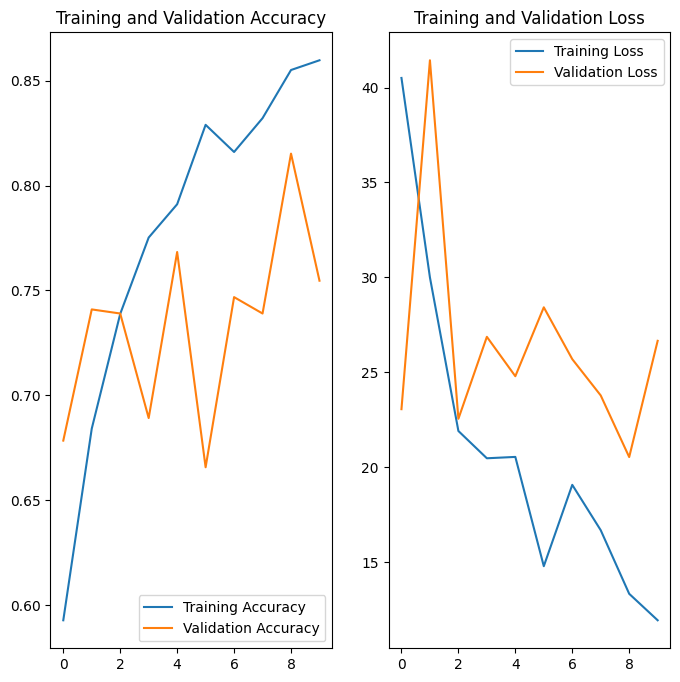

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
val_datagen = ImageDataGenerator()
#Para trabalhar com a base de dados em RGB, modificar o diretório:
#val_data_dir = "/content/drive/MyDrive/TEIA/Final/RGB/Validacao/"
val_data_dir = "/content/drive/MyDrive/TEIA/Final/Escala de cinza/Validacao"

In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    #Retirar o parâmetro 'color_mode' para trabalhar com base de dados em RGB:
    color_mode = 'grayscale'
)

Found 456 images belonging to 4 classes.


In [ ]:
class_labels = list(val_generator.class_indices.keys())

In [ ]:
num_images = len(val_generator.filenames)

In [ ]:
all_images = []
all_true_labels = []

In [ ]:
for i in range(num_images // batch_size):
    images, true_labels = next(val_generator)
    all_images.append(images)
    all_true_labels.append(true_labels)

In [ ]:
all_images = np.concatenate(all_images)
all_true_labels = np.concatenate(all_true_labels)


In [ ]:
predictions = model3.predict(all_images)

14/14 [==============================] - 2s 129ms/step


In [ ]:
print("Total number of images:", len(all_images))
print(class_labels)

Total number of images: 448
['Cachorro', 'Cobra', 'Gato', 'Onca']


In [ ]:
predicted_labels = [class_labels[np.argmax(pred)] for pred in predictions]

In [ ]:
labels_true = [class_labels[np.argmax(true)] for true in true_labels]

In [ ]:
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

[0 1 0 0 1 0 2 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 2 0 0 0 2 0
 1 0 0 0 2 0 1 1 1 0 1 1 0 0 1 3 0 0 3 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 1 1 1 1 1 0 3 1 0 1 0 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 3 1 0 3 1 1 1 1
 0 1 3 3 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 3 1 1 1 1 1 1 1 1 1 0 1
 0 3 1 3 1 1 1 1 0 1 1 1 1 1 3 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 0 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 3 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 3 0 0 1 1
 1 1 2 0 2 1 2 0 1 2 0 0 1 1 1 0 0 0 0 0 2 1 1 0 1 1 1 1 0 2 0 0 1 0 0 0 1
 1 0 1 1 2 0 0 1 0 1 0 1 0 0 2 2 0 0 0 1 0 1 0 1 1 1 3 0 0 0 1 0 2 0 2 1 0
 1 0 0 0 0 1 2 2 0 1 1 3 1 1 3 3 1 3 1 3 1 1 0 1 1 3 1 1 1 3 1 1 1 1 1 1 3
 1 2 3 1]


In [ ]:
true_labels = np.argmax(all_true_labels, axis=1)
print(true_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3]


In [ ]:
accuracy = np.mean(np.equal(predicted_labels, true_labels))
accuracy_percentage = accuracy * 100

In [ ]:
print("Accuracy:", accuracy_percentage, "%")

Accuracy: 57.58928571428571 %
